In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = pd.read_csv('bank_altered.csv').columns[1:]

In [3]:
df = pd.read_csv('bank_altered.csv', usecols=columns)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,0
4,35,management,married,tertiary,0,231,1,0,unknown,5,5,139,1,-1,0,0


Since we are interested in getting depositors, and depositors must have money to deposit, perhaps the most obvious attribute to look at is 'balance'.  Lets take a cursory look.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

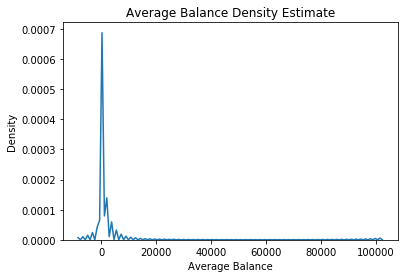

In [4]:
sns.kdeplot(df.balance.values)
plt.title("Average Balance Density Estimate")
plt.xlabel("Average Balance")
plt.ylabel("Density")

The above kernel density estimate is not that helpful, although it does illustrate that there are prospects with positive and negative average balances.

Since we are interested in distinguishing between depositors and non-depositors, lets divide the two.  Furthermore, lets take a look at the respective CDFs rather than densities.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


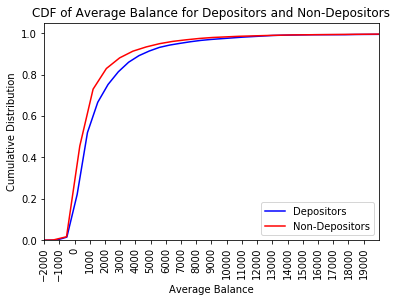

In [5]:
sns.kdeplot(df.loc[df.y==1].balance, cumulative=True, color='blue')
sns.kdeplot(df.loc[df.y==0].balance, cumulative=True, color='red')
plt.xlim([-2000, 20000])
plt.xticks(np.arange(-2000, 20000, 1000), rotation=90)
plt.title("CDF of Average Balance for Depositors and Non-Depositors")
plt.ylabel("Cumulative Distribution")
plt.xlabel("Average Balance")
plt.legend(['Depositors', 'Non-Depositors'])
plt.show()

It appears from the CDF estimate above that depositors tend to have a higher average balance than non-depositors.

In [6]:
df.balance.describe()

count     44920.000000
mean       1359.599176
std        3045.120516
min       -8019.000000
25%          72.000000
50%         447.000000
75%        1421.000000
max      102127.000000
Name: balance, dtype: float64

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


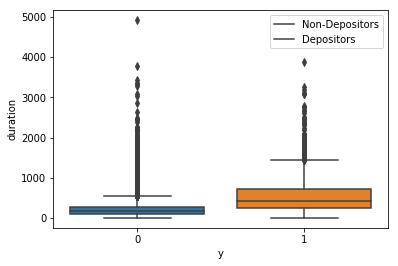

In [7]:
sns.boxplot(x='y', y='duration', data=df)
plt.legend(['Non-Depositors', 'Depositors'])
plt.show()

It appears from the boxplots above that there are a fair number of outliers with regard to call duration.

Now lets take a look at some kernel density estimates to see if we can discern anything interesting.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


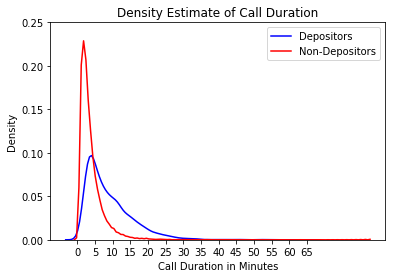

In [8]:
sns.kdeplot(df.loc[df.y==1].duration/60, color='blue')
sns.kdeplot(df.loc[df.y==0].duration/60, color='red')
plt.legend(['Depositors', 'Non-Depositors'])
plt.xticks(np.arange(0, 70, 5))
plt.yticks(np.arange(0, 0.3, 0.05))
plt.title("Density Estimate of Call Duration")
plt.xlabel("Call Duration in Minutes")
plt.ylabel("Density")
plt.show()

Not surpirisingly, it appears from the kernel density estimates that non-depositors are less likely to have had a call exceeding 5 minutes and much more likely to have a call less than 5 minutes than depositors.

I suspect that call duration is an indication of interest in the product.  Thus longer call durations will be associated with the depositor class.

For giggles, lets look at the CDFs.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Call Duration in Minutes')

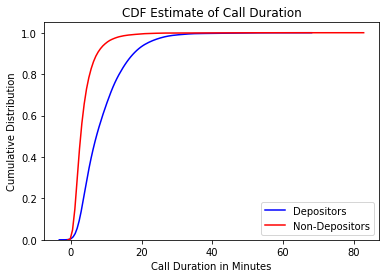

In [9]:
sns.kdeplot(df.loc[df.y==1].duration/60, cumulative=True, color='blue')
sns.kdeplot(df.loc[df.y==0].duration/60, cumulative=True, color='red')
plt.legend(['Depositors', 'Non-Depositors'])
plt.title("CDF Estimate of Call Duration")
plt.ylabel("Cumulative Distribution")
plt.xlabel("Call Duration in Minutes")

The CDF estimate above mirrors the results of the kernel density estimation.

Now I wonder if age plays a role whether or not a prospect purchases a term deposit.  My presumption is that older prospects, to a point, will generally be more interested in term deposits due to retirement concerns, and that past a certain age interest will dwindle due to a lack of life left to finance.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


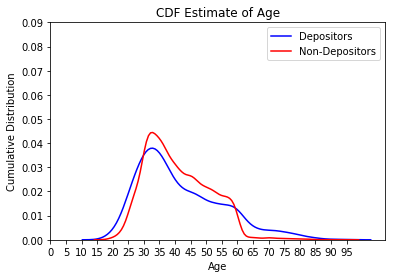

In [10]:
sns.kdeplot(df.loc[df.y==1].age, color='blue')
sns.kdeplot(df.loc[df.y==0].age, color='red')
plt.legend(['Depositors', 'Non-Depositors'])
plt.title("CDF Estimate of Age")
plt.ylabel("Cumulative Distribution")
plt.xlabel("Age")
plt.xticks(np.arange(0,100,5))
plt.yticks(np.arange(0,0.1,0.01))
plt.show()

It appears from the kernel density estimates of age that a greater portion of non-depositors are between the ages of 30 and 60 while a greater portion of depositors are 60+.

Thus far it appears that both age and balance may play some role in whether or not a prospect purchases a term deposit.  Now I wonder if there is a relationship between balance and age.  After all, one would expect that aged prospects will have had more opportunity to accumulate funds to invest.

Lets look at a scatter plot.

(-2000, 40000)

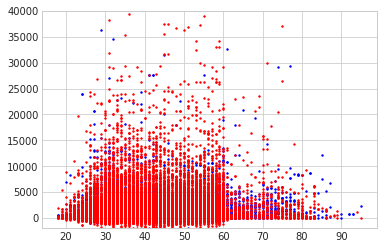

In [11]:
sns.set_style('whitegrid')
plt.scatter(df.loc[df.y==1].age, df.loc[df.y==1].balance, color='blue', s=2)
plt.scatter(df.loc[df.y==0].age, df.loc[df.y==0].balance, color='red', s=2)
plt.ylim([-2000, 40000])

This is far too confusing to look at.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


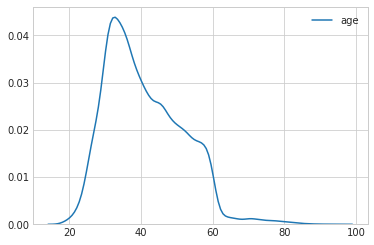

In [15]:
sns.kdeplot(df.age)
plt.show()

The KDE above shows that most prospects are above the age of 20 and below the age of 60.  Lets take a look at the quartiles of age.

In [16]:
df.age.describe()

count    44920.000000
mean        40.893611
std         10.604460
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Now lets see how average balance varies according to the interquartile range given above.

In [23]:
def age_categorizor(entry):
    if entry <= 33:
        return "Under 33"
    elif entry > 33 and entry <= 39:
        return "Between 33 and 39"
    elif entry > 39 and entry <= 48:
        return "Between 39 and 48"
    else:
        return "Over 48"

In [37]:
df_bracket_balance = df.join(pd.DataFrame({'age_bracket':df.age.apply(age_categorizor)}), how='inner')[['age_bracket', 'balance']]

/usr/lib/python3/dist-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/lib/python3/dist-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


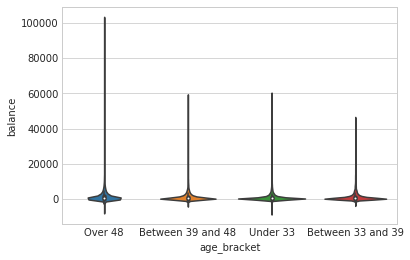

In [38]:
sns.violinplot(x='age_bracket', y='balance', data=df_bracket_balance)
plt.show()

It would appear that these age groups are rather similar in terms of average balance, except for the fact that a larger portion of those over the age of 48 have a greater average balance than the rest.

For giggles lets look at the CDF of balance conditioned on the age brackets.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


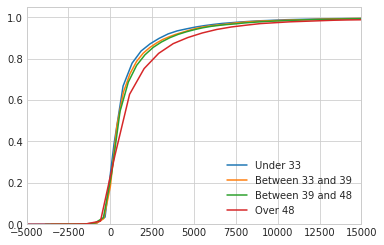

In [52]:
sns.kdeplot(df.loc[df.age <= 33].balance, cumulative=True)
sns.kdeplot(df.loc[(df.age > 33) & (df.age <= 39)].balance, cumulative=True)
sns.kdeplot(df.loc[(df.age > 39) & (df.age <= 48)].balance, cumulative=True)
sns.kdeplot(df.loc[df.age > 48].balance, cumulative=True)
plt.legend(['Under 33', 'Between 33 and 39', 'Between 39 and 48', 'Over 48'])
plt.xlim([-5000,15000])
plt.show()

The CDFs appear to confirm what the violin plot suggested, that a larger portion of those over the age of 48 have a higher average balance than the other age brackets.

Now lets look at those with and without existing credit default in relation to whether or not they are apt to purchase a term deposit.

In [57]:
default_depositor = df[['default', 'y']]

In [60]:
default_depositor.default = default_depositor.default.apply(lambda x: "default" if x==1 else "no default")

/home/robert/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
default_depositor.y = default_depositor.y.apply(lambda x: "depositor" if x == 1 else "non-depositor")

/home/robert/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


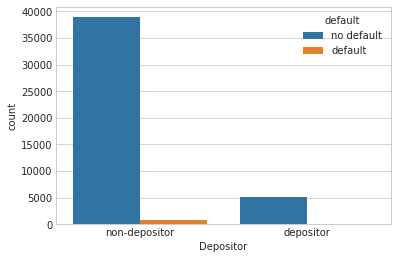

In [71]:
sns.countplot(x = 'y', hue = "default", data=default_depositor)
plt.xlabel('Depositor')
plt.show()

It would appear that there are absolutely were no depositors with a loan in default.  Sensible.

In [74]:
default_depositor.loc[(default_depositor.default == "default") & (default_depositor.y == "depositor"), 'y'].describe()

count            52
unique            1
top       depositor
freq             52
Name: y, dtype: object

In fact, the number of depositors also in default is not zero, although there are very few.